In [90]:
from run_single_stock import prepare_stock_data, load_config
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



In [100]:
stock = 'AAPL'

config = load_config()

data = prepare_stock_data([stock], config["start_date"], config["end_val_date"])

Load binance data

In [60]:
# stock = 'SOLUSDT'

# config = load_config()
# data = prepare_stock_data([stock], '2020-08-12 00:00:00', '2020-08-17 23:59:00')

# data_train[stock] = data[stock][:60*24*2]
# data_test[stock] = data[stock][60*24*2 : 60*24*2 + 60*24//3] 

Load binance data (ramasite din parserul de date binance)

In [ ]:
# from dqn.data_processing import load_data

# bucket_nums = 1
# data = None
# for bucket in range(0, bucket_nums):
#     print(f"Loading bucket {bucket}")
#     bucket_data = load_data(f"data_binance/SOLUSDT_buckets/SOLUSDT-1m-{bucket}.csv")
#     # print(bucket_data.head())
#     data = pd.concat([data, bucket_data], axis=0)
#     # print('concated\n', data.head())
    
# from stock_data_pipeline import StockDataPipeline

# from dqn.data_processing import load_data

# bucket_nums = 1
# data = None
# for bucket in range(0, bucket_nums):
#     print(f"Loading bucket {bucket}")
#     bucket_data = load_data(f"data_binance/SOLUSDT_buckets/SOLUSDT-1m-{bucket}.csv")
#     # print(bucket_data.head())
#     data = pd.concat([data, bucket_data], axis=0)
#     # print('concated\n', data.head())

# # data.rename(columns={
# #     'date': 'Date',
# #     'open': 'Open',
# #     'high': 'High',
# #     'low': 'Low',
# #     'close': 'Close',
# #     'volume': 'Volume'
# # }, inplace=True)
# # data.drop(columns=['nrOfTrades'], inplace=True)
# # data['Adj Close'] = data['Close']
# # data.to_csv('data/SOLUSDT.csv')

# data_pipeline = StockDataPipeline(['SOLUSDT'], config["start_date"], config["end_date"])
# data = data_pipeline.run()
# data

Normalize data

In [278]:
scaler = MinMaxScaler()
data[stock] = pd.DataFrame(scaler.fit_transform(data[stock]), columns=['Open','High','Low','Close','Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX'], index=data[stock].index)


data_train = {}
data_test = {}
data_train[stock] = data[stock][:int(len(data[stock])*0.7)]
data_test[stock] = data[stock][int(len(data[stock])*0.7):]

In [279]:
data_train[stock].describe()

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.288260,0.300696,0.296705,0.295816,0.221031,0.354663,0.373928,0.521588,0.517650,0.357013
std,0.175322,0.179804,0.181754,0.180516,0.118441,0.187634,0.193884,0.242878,0.195805,0.242443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081678
25%,0.141638,0.149635,0.137283,0.141093,0.149422,0.208065,0.235906,0.335191,0.375948,0.179495
50%,0.249265,0.261291,0.262163,0.251873,0.200078,0.341106,0.378808,0.470847,0.523089,0.259928
75%,0.433107,0.470746,0.454901,0.447741,0.264662,0.465111,0.472972,0.674540,0.678455,0.501426
max,0.656723,0.662637,0.684008,0.672285,1.000000,0.810896,0.834176,1.000000,0.896683,1.000000


In [106]:
data_test[stock].describe()

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.830129,0.848963,0.863608,0.849644,0.203949,0.332045,0.399390,0.401278,0.458484,0.204497
std,0.052488,0.049266,0.049978,0.049230,0.109931,0.156086,0.227548,0.131500,0.198036,0.107877
min,0.725424,0.775548,0.770231,0.748127,0.062982,0.180790,0.211773,0.063219,0.054086,0.000000
25%,0.798870,0.815351,0.829841,0.814607,0.129911,0.228157,0.226677,0.322561,0.341692,0.152768
50%,0.821469,0.847400,0.858622,0.849251,0.178654,0.297920,0.313462,0.378387,0.456256,0.207549
75%,0.861582,0.878308,0.888487,0.872425,0.245401,0.355368,0.463536,0.469674,0.544808,0.253854
max,1.000000,1.000000,0.999518,0.991807,0.595577,0.827976,0.978568,0.719673,1.000000,0.456664


<Axes: xlabel='Date'>

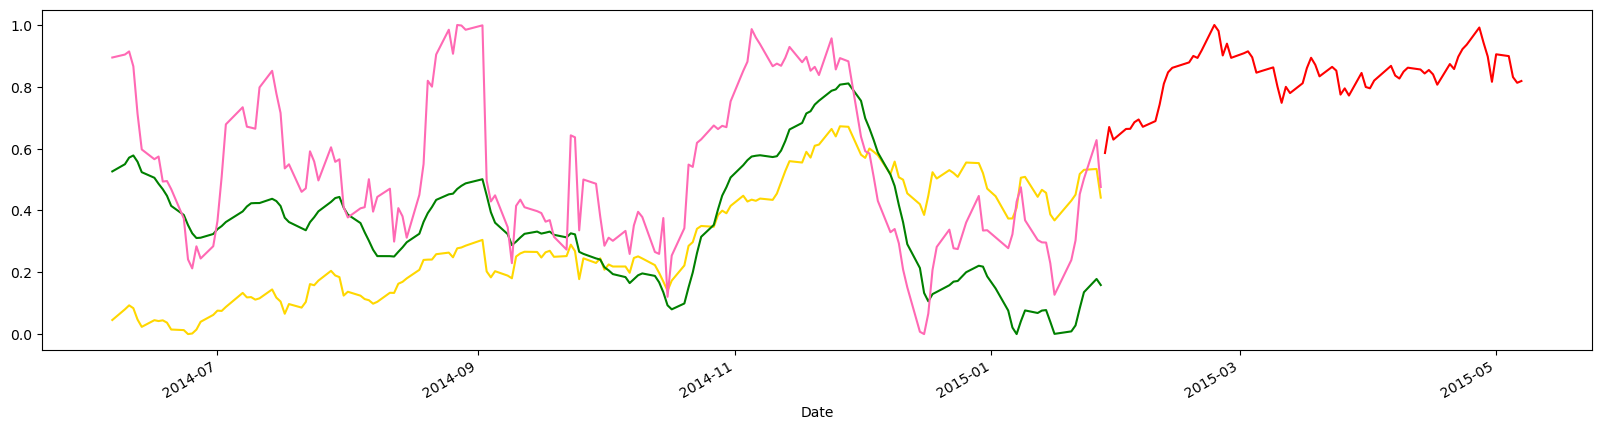

In [280]:
data_train[stock]['Close'].plot(figsize=(20, 5), color='gold')
data_train[stock]['MACD'].plot(figsize=(20, 5), color='g')
data_train[stock]['RSI'].plot(figsize=(20, 5), color='hotpink')

data_test[stock]['Close'].plot(figsize=(20, 5), color='r')

<Axes: xlabel='Date'>

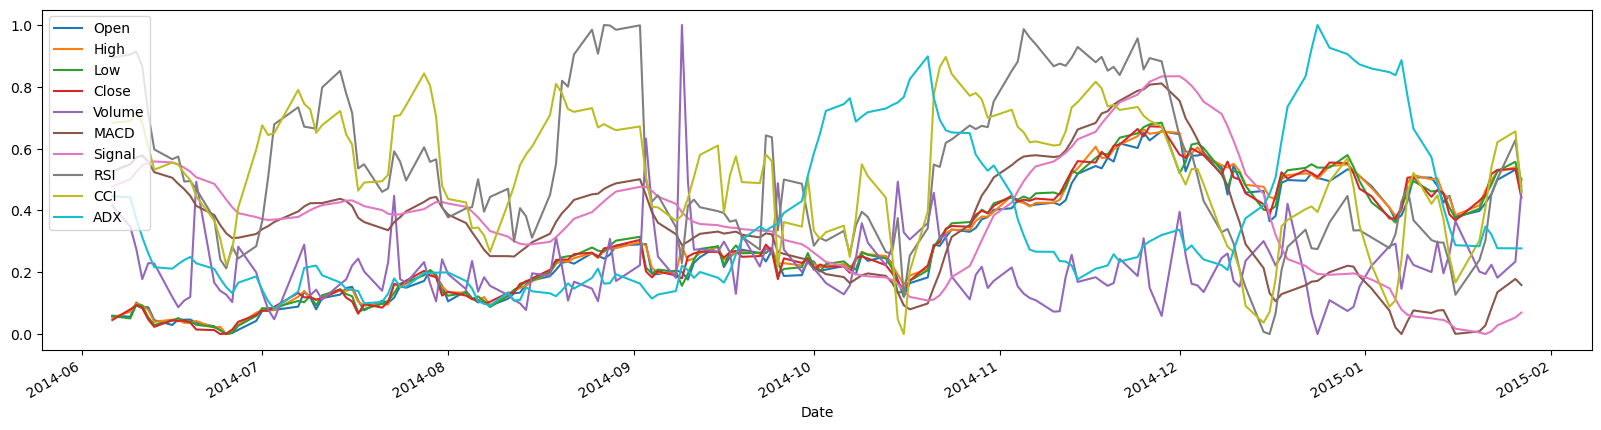

In [281]:
data_train[stock].plot(figsize=(20, 5))

In [282]:
print('Null Values =',data_train[stock].isnull().values.any())
print('Null Values =',data_test[stock].isnull().values.any())

Null Values = False
Null Values = False


In [286]:
import gym
import numpy as np
from enum import Enum

class Actions(Enum):
    Sell = 0
    Buy = 1

class StockTradingEnv(gym.Env):
    def __init__(self, df, window_size, initial_balance=10000):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.window_size = window_size
        
        self.prices = df['close'].values if 'close' in df.columns else df['Close'].values
        self.shape_features = (window_size, self.df.shape[1])
        self.initial_balance = initial_balance
        self.balance = self.initial_balance
        
        # Spaces
        self.action_space = gym.spaces.Discrete(len(Actions))
        
        # Observations
        INF = 1e10
        self.observation_space = gym.spaces.Box(
            low=-INF, high=INF, shape=self.shape_features, dtype=np.float32,
        )
        
        # Variables
        self._current_tick = window_size
        self._end_tick = len(self.prices) - 1
        self._total_reward = 0
        self._position_size = 0
        
    
    def step(self, action):
        self._current_tick += 1
        
        done = False
        if self._current_tick >= self._end_tick:
            done = True
        
        step_reward = self._calculate_reward(action)
        self._total_reward += step_reward
        
        self._take_action(action)
        
            
        observation = self._get_observation()
        
        return observation, step_reward, done, self._get_info()
        
    def _calculate_reward(self, action):
        if action == Actions.Buy.value and self.balance > 0:
            return 0
        reward = 0
        
        current_price = self.prices[self._current_tick]
        last_trade_price = self.prices[self._last_buy_tick - 1]
        reward += current_price - last_trade_price
            
        return reward
    
    
    def _get_observation(self):
        return self.df.iloc[self._current_tick - self.window_size:self._current_tick].values
    
    def _get_info(self):
        return {
            'total_reward': self._total_reward,
            'balance': self.balance,
            'position': self._position_size * self.prices[self._current_tick],
        }
    
    def _take_action(self, action):
        current_price = self.prices[self._current_tick]
        
        if action == Actions.Buy.value and self.balance > 0:
            self._last_buy_tick = self._current_tick
            self._position_size = self.balance / current_price
            self.balance = 0
        
        if action == Actions.Sell.value and self._position_size > 0:
            self.balance = self._position_size * current_price
            self._position_size = 0
    
    def render(self):
        print(f'Balance: {self.balance}, Total Reward: {self._total_reward}, Position: {self._position_size * self.prices[self._current_tick]}')
    
    def reset(self):
        super().reset()
        self.balance = self.initial_balance
        self._position_size = 0
        self._current_tick = self.window_size
        self._last_buy_tick = self._current_tick - 1
        return self._get_observation()
        

In [287]:
df_train = data_train[stock]

In [288]:
WINDOW_SIZE = 14

In [289]:
from stable_baselines3.dqn.policies import MlpPolicy
from stable_baselines3 import DQN

env = StockTradingEnv(df_train, WINDOW_SIZE)
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/ionut/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.14GB > 0.94GB
  warnings.warn(


In [290]:
EPOCHS = 10
TIMESTAMPS = df_train.shape[0]
print(TIMESTAMPS)
model.learn(total_timesteps=TIMESTAMPS * EPOCHS, log_interval=1, progress_bar=True)

Output()

162


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 0.934    |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 586      |
|    time_elapsed     | 0        |
|    total_timesteps  | 147      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00174  |
|    n_updates        | 11       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 2.29     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2        |
|    fps              | 560      |
|    time_elapsed     | 0        |
|    total_timesteps  | 294      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00207  |
|    n_updates        | 48       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 7.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3        |
|    fps              | 541      |
|    time_elapsed     | 0        |
|    total_timesteps  | 441      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00203  |
|    n_updates        | 85       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 8.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 544      |
|    time_elapsed     | 1        |
|    total_timesteps  | 588      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00496  |
|    n_updates        | 121      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 9.59     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5        |
|    fps              | 558      |
|    time_elapsed     | 1        |
|    total_timesteps  | 735      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00475  |
|    n_updates        | 158      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6        |
|    fps              | 547      |
|    time_elapsed     | 1        |
|    total_timesteps  | 882      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00422  |
|    n_updates        | 195      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7        |
|    fps              | 553      |
|    time_elapsed     | 1        |
|    total_timesteps  | 1029     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00433  |
|    n_updates        | 232      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 553      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1176     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00286  |
|    n_updates        | 268      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9        |
|    fps              | 556      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1323     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00432  |
|    n_updates        | 305      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 13.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10       |
|    fps              | 560      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1470     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0015   |
|    n_updates        | 342      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 14.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11       |
|    fps              | 564      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1617     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00434  |
|    n_updates        | 379      |
----------------------------------


In [291]:
df_test = data_test[stock]

In [292]:
def plot_actions_over_price_action(actions, toPlot:{}):
    """
    Plot the actions taken by the agent over the price action.

    Parameters:
    - actions: List of actions taken by the agent.
    - prices: List of prices of the stock.
    """
    plt.figure(figsize=(20, 10))
    for key in toPlot:
        plt.plot(toPlot[key], label=key)
    
    plt.title('Actions taken by the agent over the price action')
    plt.xlabel('Time')
    plt.ylabel('Price')

    old_action = Actions.Sell.value
    for i in range(len(actions)):
        if actions[i] != old_action:
            if actions[i] == 1:
                plt.axvline(x=i, color='g', linestyle='--', alpha=0.5)
            elif actions[i] == 0:
                plt.axvline(x=i, color='r', linestyle='--', alpha=0.5)
            old_action = actions[i]
            
    plt.legend()
    plt.show()

In [299]:
def validate_model(model, env, num_episodes=10):
    """
    Validate the RL model on the given environment.

    Parameters:
    - model: The trained RL model.
    - env: The environment to validate the model on.
    - num_episodes: Number of episodes to run for validation.

    Returns:
    - average_reward: The average reward obtained over the validation episodes.
    """
    total_rewards = []
    total_balances = []

    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        episode_balance = 0
        actions = []

        step = 0
        while not done:
            action, _states = model.predict(obs)
            obs, reward, done, info = env.step(action)
            episode_reward += reward
            
            # if step % 500 == 0:
            #     env.render()
                
            if done:
                env.render()
                episode_balance = info['balance'] + info['position'] # one of two will be zero
                
            step += 1
            actions.append(action)
            
        print(f'Episode {episode + 1}: {episode_reward}, Final Balance: {episode_balance}')
        total_rewards.append(episode_reward)
        total_balances.append(episode_balance)
        
        if num_episodes == 1:
            plot_actions_over_price_action(actions, {'prices':env.prices})

    average_reward = np.mean(total_rewards)
    print(f'Average Reward over {num_episodes} episodes: {average_reward}')
    average_balance = np.mean(total_balances)
    print(f'Average Balance over {num_episodes} episodes: {average_balance}')
    print(f'Min Balance: {min(total_balances)}')
    print(f'Max Balance: {max(total_balances)}')
    return average_reward

test_env = StockTradingEnv(df_test, WINDOW_SIZE)
average_reward = validate_model(model, test_env, num_episodes=15)

Balance: 10652.938837609812, Total Reward: 0.8637594126223593, Position: 0.0
Episode 1: 0.8637594126223593, Final Balance: 10652.938837609812
Balance: 9090.198694410932, Total Reward: 0.3288785076104528, Position: 0.0
Episode 2: -0.5348809050119065, Final Balance: 9090.198694410932
Balance: 10536.667068384577, Total Reward: 0.02667537712995216, Position: 0.0
Episode 3: -0.3022031304805006, Final Balance: 10536.667068384577
Balance: 10674.357505795419, Total Reward: 0.8363644935989365, Position: 0.0
Episode 4: 0.8096891164689843, Final Balance: 10674.357505795419
Balance: 10672.470673014614, Total Reward: 1.4559761445698638, Position: 0.0
Episode 5: 0.6196116509709273, Final Balance: 10672.470673014614
Balance: 9974.363707356011, Total Reward: 2.9929594191944866, Position: 0.0
Episode 6: 1.5369832746246228, Final Balance: 9974.363707356011
Balance: 10000, Total Reward: 2.983358740835597, Position: 0.0
Episode 7: -0.00960067835888978, Final Balance: 10000.0
Balance: 10000, Total Reward: 